In [7]:
import os
import json
from pathlib import Path
from collections import defaultdict

from functions import custom

# List of all your endpoints
endpoints = custom.list_endpoints()


In [8]:
def get_last_two_snapshots(endpoint_dir):
    """Get the two most recent snapshot files for an endpoint."""
    snapshot_files = sorted(
        [f for f in os.listdir(endpoint_dir) if f.startswith('snapshot-') and f.endswith('.json')],
        reverse=True
    )
    
    if len(snapshot_files) < 2:
        return None, None
    
    return (
        os.path.join(endpoint_dir, snapshot_files[0]),  # Latest
        os.path.join(endpoint_dir, snapshot_files[1])   # Second latest
    )

In [9]:
def load_ids_from_snapshot(filepath):
    """Load all IDs from a snapshot file."""
    with open(filepath, 'r') as f:
        data = json.load(f)
    return set(item['ID'] for item in data)

In [10]:
def compare_snapshots(endpoint_name, base_dir='../data/raw'):
    """Compare the last two snapshots for an endpoint."""
    endpoint_dir = os.path.join(base_dir, endpoint_name)
    
    latest_file, previous_file = get_last_two_snapshots(endpoint_dir)
    
    if not latest_file or not previous_file:
        print(f"Not enough snapshots for {endpoint_name}")
        return None
    
    latest_ids = load_ids_from_snapshot(latest_file)
    previous_ids = load_ids_from_snapshot(previous_file)
    
    removed_ids = previous_ids - latest_ids  # In previous but not in latest
    created_ids = latest_ids - previous_ids  # In latest but not in previous
    
    return {
        'endpoint': endpoint_name,
        'latest_file': latest_file,
        'previous_file': previous_file,
        'removed': list(removed_ids),
        'created': list(created_ids),
        'removed_count': len(removed_ids),
        'created_count': len(created_ids),
        'total_count': len(latest_ids)
    }

In [11]:

# Analyze all endpoints
results = {}
for endpoint in endpoints:
    try:
        result = compare_snapshots(endpoint)
        
        if result:
            results[endpoint] = result

            # Print summary
            print(f"\n{endpoint}:")
            print(f"  Removed: {result['removed_count']} items")
            print(f"  Created: {result['created_count']} items")
            print(f"  Total: {result['total_count']} items")

            # if result['removed']:
            #     print(f"  Removed IDs: {result['removed']}")
            # if result['created']:
            #     print(f"  Created IDs: {result['created']}")
    except:
        print("Compare didn't work for endpoint {}.".format(endpoint))


getAssembler:
  Removed: 1 items
  Created: 6 items
  Total: 24 items

getBelts:
  Removed: 11 items
  Created: 42 items
  Total: 603 items

getCables:
  Removed: 20 items
  Created: 25 items
  Total: 470 items

getExtractor:
  Removed: 0 items
  Created: 2 items
  Total: 48 items

getFoundry:
  Removed: 0 items
  Created: 0 items
  Total: 6 items

getGenerators:
  Removed: 0 items
  Created: 0 items
  Total: 23 items

getHypertube:
  Removed: 0 items
  Created: 0 items
  Total: 9 items

getLifts:
  Removed: 0 items
  Created: 9 items
  Total: 81 items

getManufacturer:
  Removed: 0 items
  Created: 0 items
  Total: 0 items

getStorageInv:
  Removed: 6 items
  Created: 1 items
  Total: 38 items

getConstructor:
  Removed: 3 items
  Created: 0 items
  Total: 81 items

getStorageInv:
  Removed: 6 items
  Created: 1 items
  Total: 38 items

getPackager:
  Removed: 0 items
  Created: 0 items
  Total: 1 items

getPipes:
  Removed: 2 items
  Created: 4 items
  Total: 98 items
Compare didn't

/tmp/ipykernel_472670/308507616.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


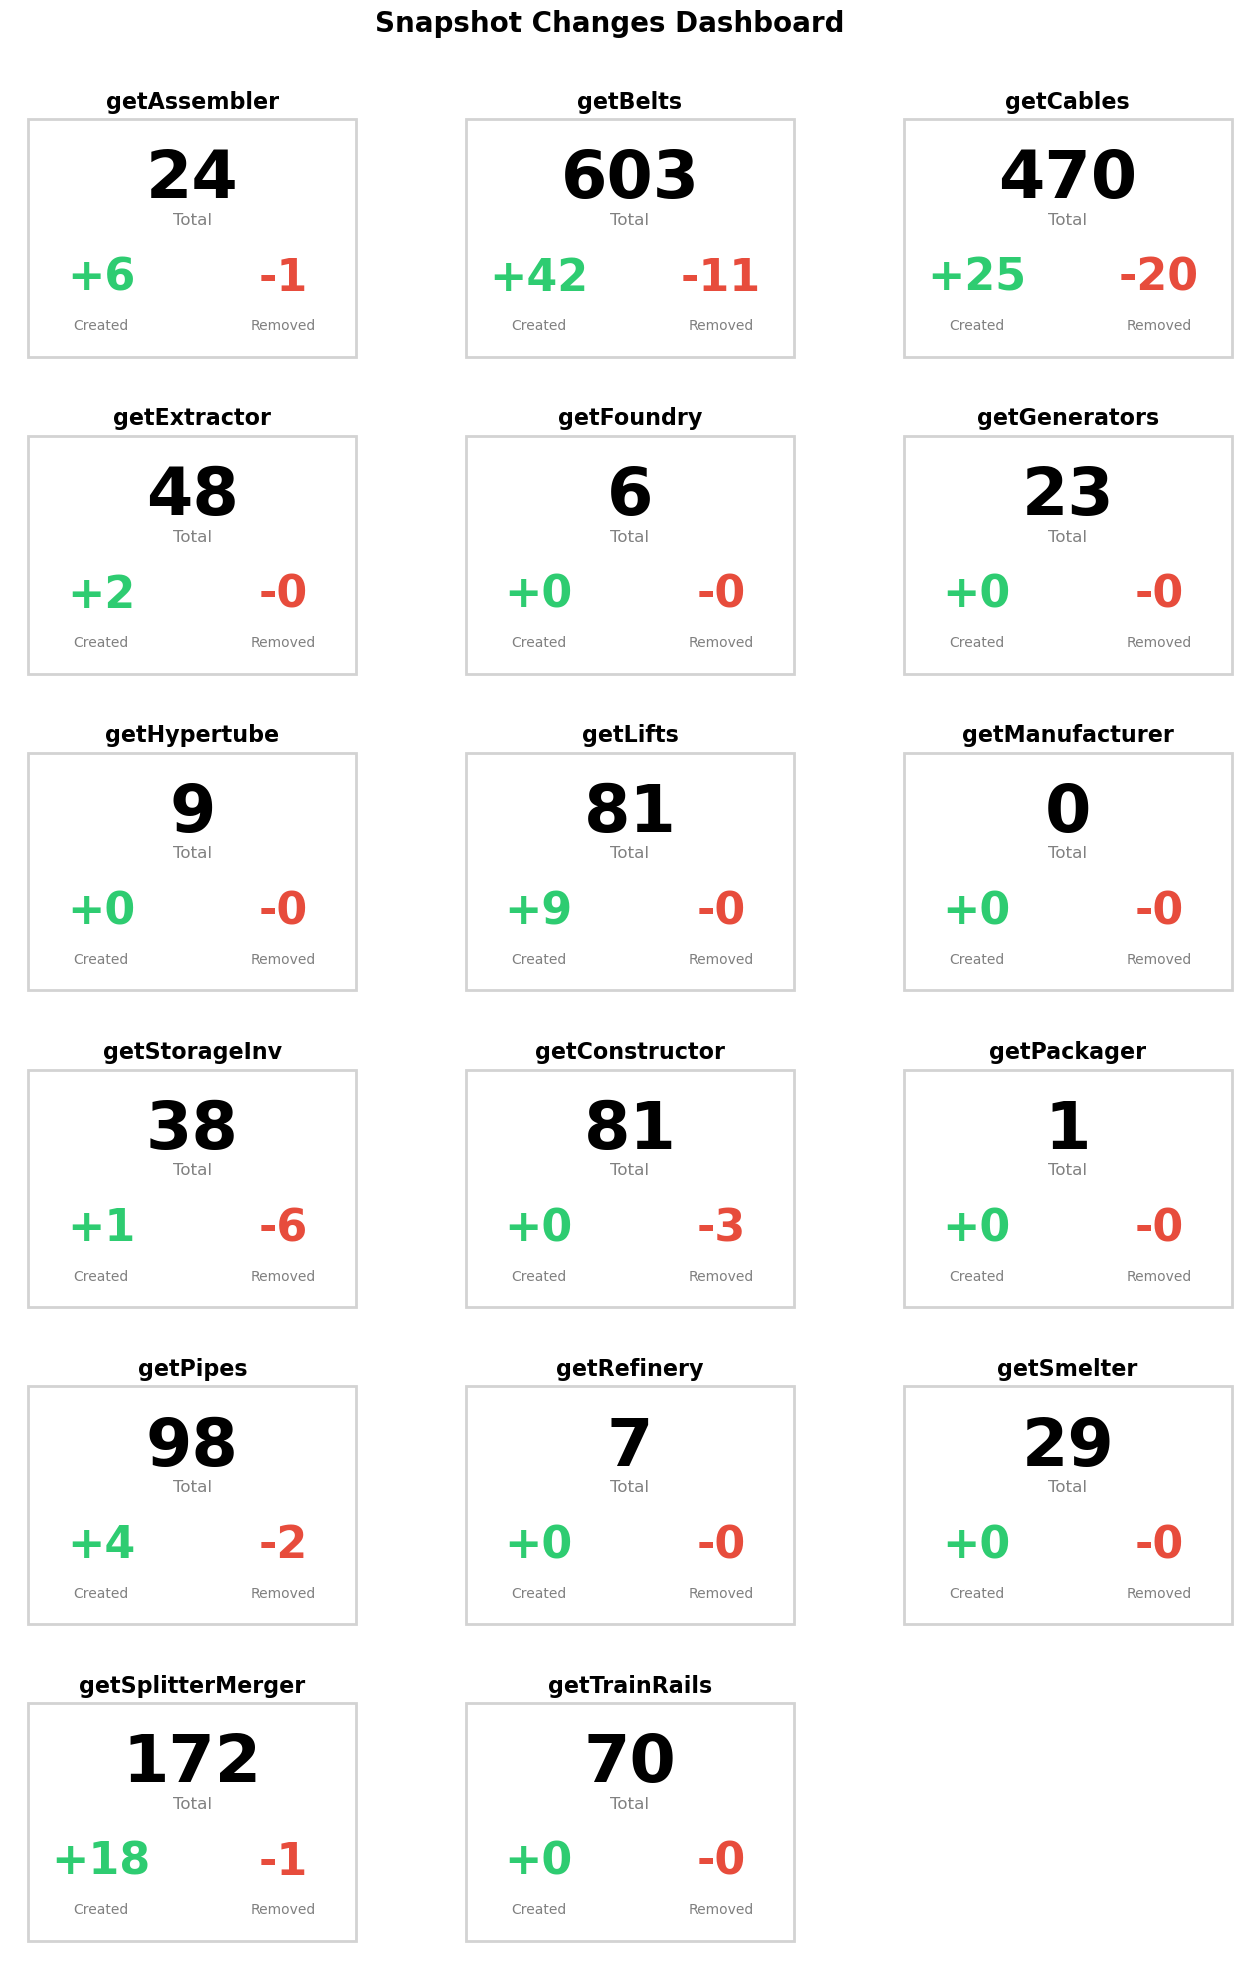

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def create_dashboard(results):
    """Create a dashboard showing counts for each endpoint."""
    
    endpoints = list(results.keys())
    num_endpoints = len(endpoints)
    
    # Calculate grid dimensions (adjust rows/cols as needed)
    cols = 3  # 3 endpoints per row
    rows = (num_endpoints + cols - 1) // cols  # Ceiling division
    
    # Create figure
    fig = plt.figure(figsize=(16, 4 * rows))
    fig.suptitle('Snapshot Changes Dashboard', fontsize=20, fontweight='bold', y=0.92)
    
    # Create gridspec
    gs = gridspec.GridSpec(rows, cols, figure=fig, hspace=0.2, wspace=0.2)
    
    # Create subplot for each endpoint
    for idx, endpoint in enumerate(endpoints):
        row = idx // cols
        col = idx % cols
        
        ax = fig.add_subplot(gs[row, col])
        ax.axis('off')  # Hide axes
        
        data = results[endpoint]
        
        # Endpoint title
        ax.text(0.5, 0.99, endpoint, 
                horizontalalignment='center',
                fontsize=16, fontweight='bold',
                transform=ax.transAxes)
        
        # Total count (black)
        ax.text(0.5, 0.65, f"{data['total_count']}", 
                horizontalalignment='center',
                fontsize=48, fontweight='bold',
                color='black',
                transform=ax.transAxes)
        ax.text(0.5, 0.55, 'Total', 
                horizontalalignment='center',
                fontsize=12,
                color='gray',
                transform=ax.transAxes)
        
        # Created count (green)
        ax.text(0.25, 0.3, f"+{data['created_count']}", 
                horizontalalignment='center',
                fontsize=32, fontweight='bold',
                color='#2ecc71',  # Green
                transform=ax.transAxes)
        ax.text(0.25, 0.15, 'Created', 
                horizontalalignment='center',
                fontsize=10,
                color='gray',
                transform=ax.transAxes)
        
        # Removed count (red)
        ax.text(0.75, 0.3, f"-{data['removed_count']}", 
                horizontalalignment='center',
                fontsize=32, fontweight='bold',
                color='#e74c3c',  # Red
                transform=ax.transAxes)
        ax.text(0.75, 0.15, 'Removed', 
                horizontalalignment='center',
                fontsize=10,
                color='gray',
                transform=ax.transAxes)
        
        # Add a subtle box around each endpoint
        from matplotlib.patches import Rectangle
        rect = Rectangle((0.05, 0.05), 0.9, 0.9,
                         linewidth=2, edgecolor='lightgray',
                         facecolor='none', transform=ax.transAxes)
        ax.add_patch(rect)
    
    plt.tight_layout()
    return fig

# Create and display the dashboard
fig = create_dashboard(results)
plt.savefig('snapshot_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()
